# Gapfilling example

shows and example of what the interpolation and gapfilling does to fill in holes in the data.

Note this particular example has a LOT of data missing.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pyplume.dataloaders import SurfaceGrid
from pyplume.thredds_data import SRC_THREDDS_HFRNET_UCSD
import pyplume.utils as utils
from pyplume.simulation import ParcelsSimulation
from pyplume.gapfilling import Gapfiller

empty = (None, {}, "", [])

INFO: Compiled ParcelsRandom ==> /var/folders/1n/b2_3gqts5wq23bs7yfyq3fvr0000gn/T/parcels-501/libparcels_random_5f180094-535d-4d67-ac57-8be1f1a6866e.so


In [3]:
# This is the domain near the San Diego Bay
domain={"S":32.3,"N":32.73,"W":-117.56,"E":-117.07}

# load tijuana river plume tracker config
cfg = utils.load_config(utils.PARCELS_CONFIGS_DIR / "plume_track.json")
ocean_cfg = utils.get_path_cfg(cfg["netcdf_data"]["ocean"])
ds = load_data(datasource=SRC_THREDDS_HFRNET_UCSD, **ocean_cfg)

Timespan reaches the min/max of the range
Latitude span reaches the min/max of the range
Longitude span reaches the min/max of the range


## no interpolation or gapfilling

Detected latitude key as yf
Detected longitude key as xf
Particle trajectories for none will be saved to particledata/particle_none.nc
    total particles in simulation: 12000
No last interval exists.
Num snapshots to save for none: 121


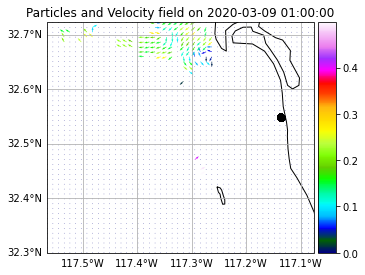

In [4]:
grid = SurfaceGrid(ds)
sim1 = ParcelsSimulation("none", grid, cfg["parcels_config"])
sim1.pset.show(field="vector",domain=domain)

## interpolation only

using lower resolution data (2 km and 6 km data) to fill in gaps of the 1 km data

Retrieving thredds dataset...
Data for type ThreddsCode.USWC_2KM_HOURLY not loaded yet. Loading from...
http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/2km/hourly/RTV/HFRADAR_US_West_Coast_2km_Resolution_Hourly_RTV_best.ncd
Retrieving thredds dataset...
Data for type ThreddsCode.USWC_6KM_HOURLY not loaded yet. Loading from...
http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/6km/hourly/RTV/HFRADAR_US_West_Coast_6km_Resolution_Hourly_RTV_best.ncd
total invalid values on target data: 63477
Attempting to interpolate 63477 points...
total invalid values after interpolation with <pyplume.parcels_utils.SurfaceGrid object at 0x7feff8254450>: 32844
    values filled: 30633
Attempting to interpolate 32844 points...
total invalid values after interpolation with <pyplume.parcels_utils.SurfaceGrid object at 0x7feff83cf0d0>: 5482
    values filled: 27362
total invalid values on interpolated: 5482
Detected latitude key as yf
Detected longitude key as xf
Particle trajectories for interped will be s

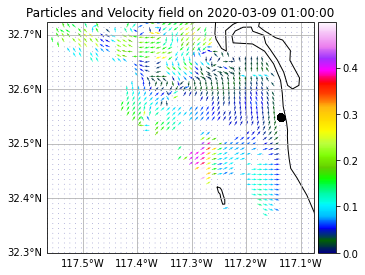

In [5]:
gapfiller = Gapfiller.load_from_config(ocean_cfg.get("gapfill_steps", [])[0])
ds2 = gapfiller.execute(SurfaceGrid(ds))
grid2 = SurfaceGrid(ds2)
sim2 = ParcelsSimulation("interped", grid2, cfg["parcels_config"])
sim2.pset.show(field="vector",domain=domain)

## interpolation and gapfilling + smoothing

this runs the previous interpolation in addition to the `smoothn` method (MATLAB method)

Retrieving thredds dataset...
Retrieving thredds dataset...
total invalid values on target data: 63477
Attempting to interpolate 63477 points...
total invalid values after interpolation with <pyplume.parcels_utils.SurfaceGrid object at 0x7ff01b7a5690>: 32844
    values filled: 30633
Attempting to interpolate 32844 points...
total invalid values after interpolation with <pyplume.parcels_utils.SurfaceGrid object at 0x7ff01b6a0950>: 5482
    values filled: 27362
total invalid values on interpolated: 5482
Filling 121 fields...
Detected latitude key as yf
Detected longitude key as xf
Particle trajectories for filledsmoothed will be saved to particledata/particle_filledsmoothed.nc
    total particles in simulation: 12000
No last interval exists.
Num snapshots to save for filledsmoothed: 121


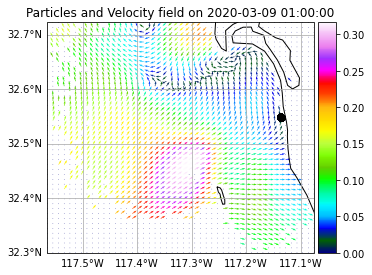

In [6]:
gapfiller = Gapfiller.load_from_config(*ocean_cfg.get("gapfill_steps", []))
ds3 = gapfiller.execute(SurfaceGrid(ds))
grid3 = SurfaceGrid(ds3)
sim3 = ParcelsSimulation("filledsmoothed", grid3, cfg["parcels_config"])
sim3.pset.show(field="vector",domain=domain)